<a href="https://colab.research.google.com/github/bilalProgTech/mtech-nmims/blob/master/speech-recognition/Lab-Work/20220918-Lab-8-MTech-AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'
!kaggle datasets download -d sourabhy/hindi-speech-recognition
!unzip hindi-speech-recognition.zip

In [ ]:
!pip install SpeechRecognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.8 MB 93 kB/s 


In [ ]:
import speech_recognition as sr

In [ ]:
path = '/content/test/audio/0116_003.wav'

In [ ]:
r = sr.Recognizer()

In [ ]:
sample_audio = sr.AudioFile(path)
with sample_audio as source:
    audio = r.record(source) #duration

In [ ]:
hindi_text = r.recognize_google(audio, language='hi-IN')
hindi_text

'और अपने पेट को मां की स्वादिष्ट गरम गरम जलेबी या तड़पते'

In [ ]:
import IPython.display as ipd
ipd.Audio(path)

In [ ]:
!pip install googletrans==3.1.0a0

In [ ]:
from googletrans import Translator

In [ ]:
translator = Translator()
translator.translate(hindi_text).text

'glad to like your hindi'

In [ ]:
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

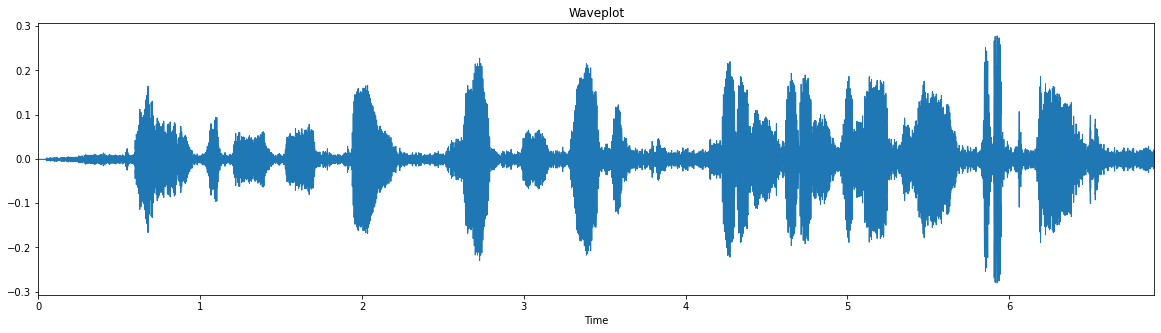

In [ ]:
x , sr = librosa.load(path)
plt.figure(figsize=(20, 5))
plt.title('Waveplot')
librosa.display.waveplot(x, sr=sr)
plt.show()

In [ ]:
signal = x

In [ ]:
type(signal)

numpy.ndarray

In [ ]:
df = pd.DataFrame({'time': range(len(signal)), 'signal': np.abs(signal)})
df.head()

,time,signal
0,0,1.480250e-06
1,1,8.166425e-07
2,2,8.349265e-07
3,3,1.863025e-06
4,4,1.049084e-06


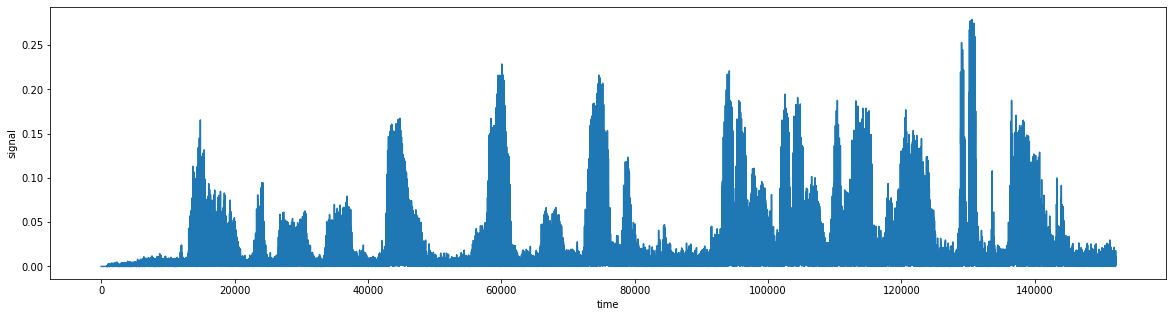

In [ ]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=df, x='time', y='signal')
plt.show()

In [ ]:
df['moving_average'] = df['signal'].rolling(2000).sum()
df.tail()

,time,signal,moving_average
152140,152140,0.013584,15.335766
152141,152141,0.012803,15.339492
152142,152142,0.010701,15.341310
152143,152143,0.007272,15.339768
152144,152144,0.003394,15.334236


In [ ]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=df, x='time', y='moving_average')
plt.show()